In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (InputLayer, Conv2D, MaxPooling2D, 
                                    Dropout, BatchNormalization, Dense,
                                    Flatten)

import json
from pathlib import Path

2024-12-14 16:06:08.815661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734192368.840039    2331 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734192368.847083    2331 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 16:06:08.875485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model Building

CNN Experiment 1
- The paper, Enhancing Early Detection of Diabetic Retinopathy, introduced a CNN model which *outperformed* the complex architectures like ResNet-50, VGG-16 etc.
- It is a 5-layer architecture
- The First convolutional layer has 8 filters, of 3 x 3 kernel.
- Incrementally increased the size to 128 channels with 5 x 5 kernel.
- ReLU activation was used.
- MaxPooling is applied, to reduce dimensions. It outputs feature maps that has the most activations.
- MaxPooling at this stage reduces the width and height from 224 to 112.
- Then Another Convolutional block is used to get 128 channels.
- Then Again Max Pooling is applied and reduce size of image to 56 x 56.
- Then a Dropout layer with 0.5 neurons deactivated, for avoiding overfit.
- Then the tensor is batch Normalized.
- Flatten Layer
- 2 Dense Layer, with last layer as the classification layer with softmax activation.
- **Expected Baseline accuracy : 95%**

 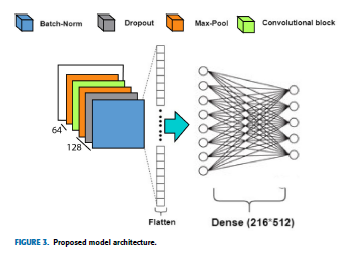

In [2]:
model_cnn_1 = Sequential([
    InputLayer(shape=(224,224,3)),
    # Conv 1
    Conv2D(filters=8,kernel_size=3,activation="relu",padding="same"),
    MaxPooling2D(strides=2), 
    # Conv 2
    Conv2D(filters=16,kernel_size=3,activation="relu",padding="same"),
    MaxPooling2D(),
    # Conv 3
    Conv2D(filters=32,kernel_size=5,activation="relu",padding="same"),
    MaxPooling2D(),
    # Conv 4
    Conv2D(filters=64,kernel_size=5,activation="relu",padding="same"),
    MaxPooling2D(),
    # Conv 5 
    Conv2D(filters=128,kernel_size=5,activation="relu",padding="same"),
    MaxPooling2D(),
    Dropout(0.5),
    BatchNormalization(),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(5, activation="softmax")
])
model_cnn_1.summary()

I0000 00:00:1734192373.361015    2331 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,485,269 (13.30 MB)

 Trainable params: 3,485,013 (13.29 MB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
with open("../config.json","r") as file:
    config = json.load(file)
    models_path = Path(config["models_folder"])
model_cnn_1.save(models_path / "cnn_1.keras")